# 9th April live Class Review Scrapper

* open in pycharm



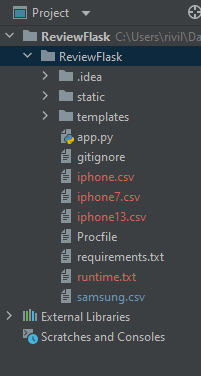


* install all the dependencies, make sure to put them into a file

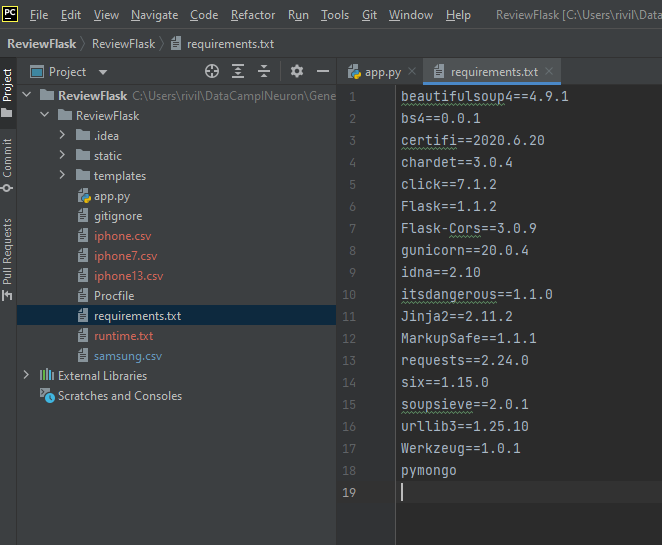

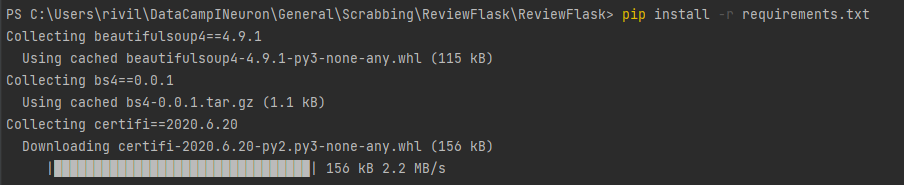

1. go to a website
2. search for a product
3. locate a rewiew part
4. scrap all the data into the local system

In [1]:
from flask import Flask, render_template, request,jsonify
from flask_cors import CORS,cross_origin
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as uReq

* searching for specific class: this specific class is found manually the first time and provides the results in a list

bigboxes = flipkart_html.findAll("div", {"class": "_1AtVbE col-12-12"})

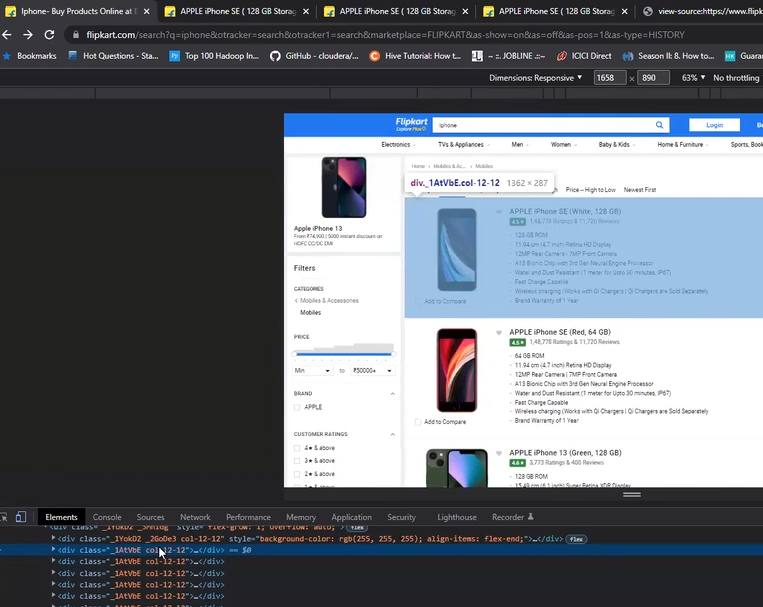


* extracting the info from a specific comment box inside of an html paragraph

name = commentbox.div.div.find_all('p', {'class': '_2sc7ZR _2V5EHH'})[0].text

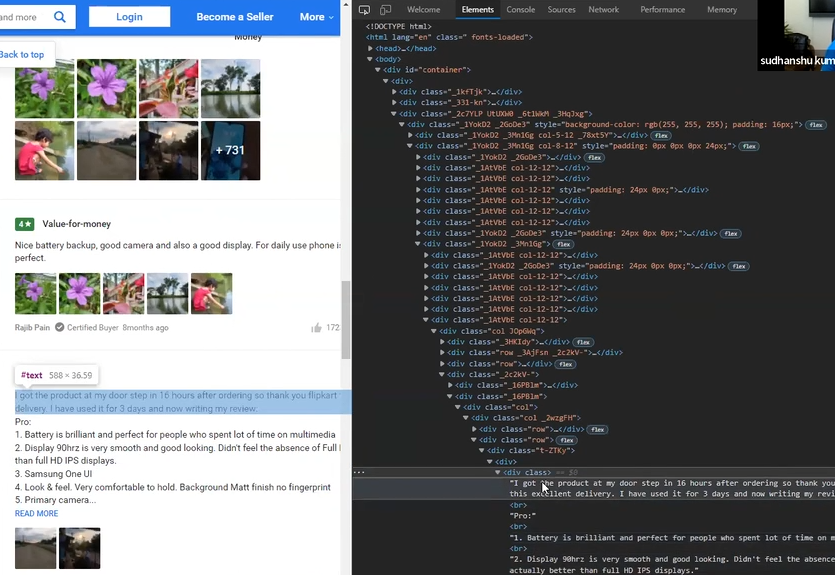

* to access rating

rating = commentbox.div.div.div.div.text

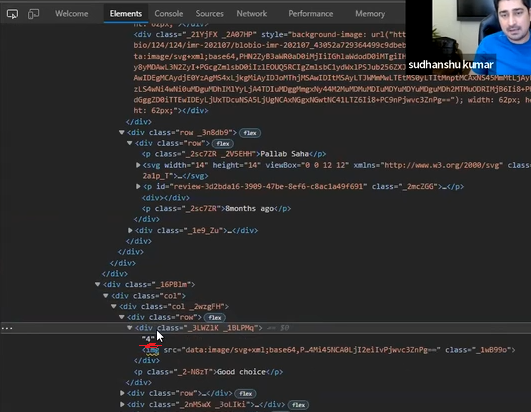



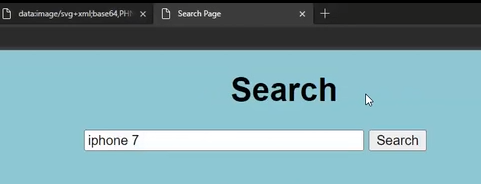

* samsung reviews in this case:

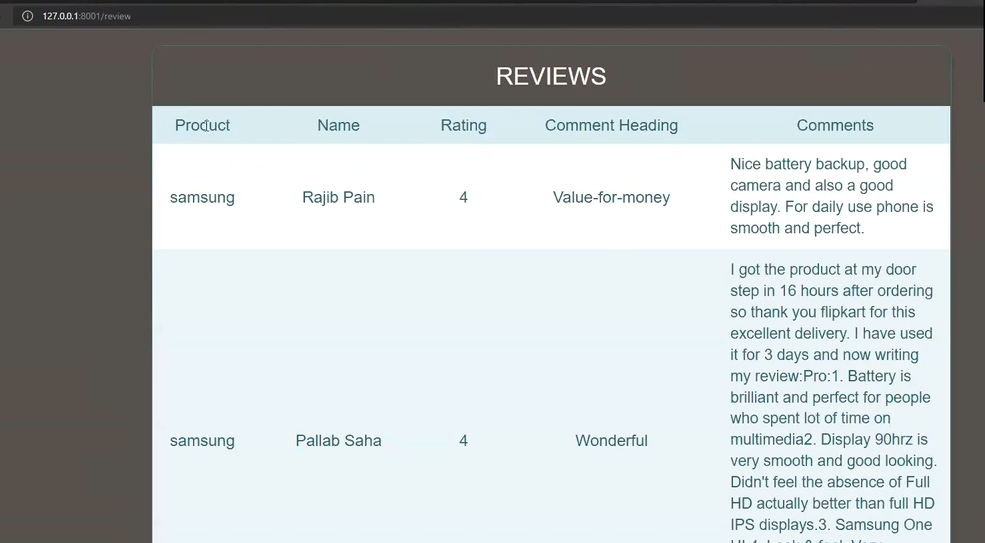

* INDEX HTML

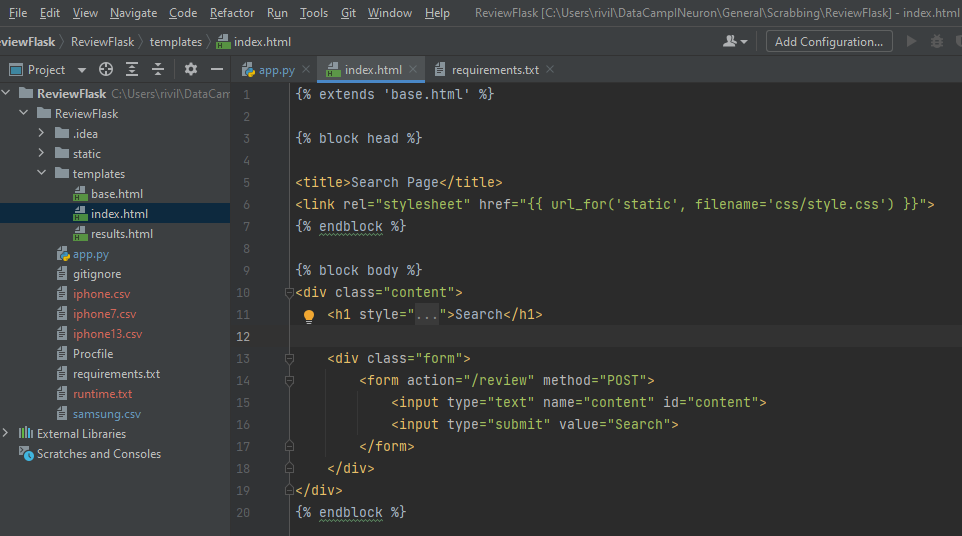

### @cross_origin()

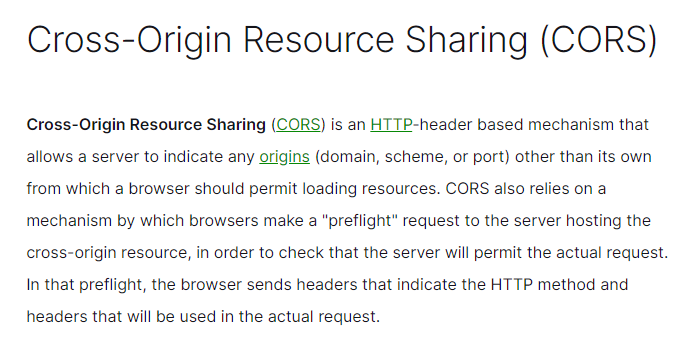

# ENTIRE CODE

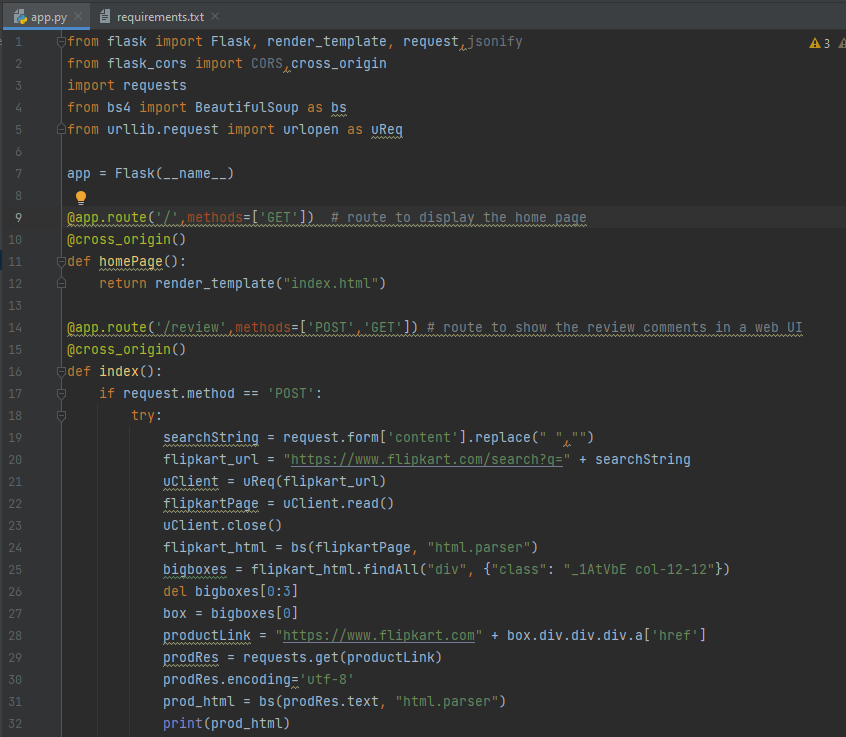

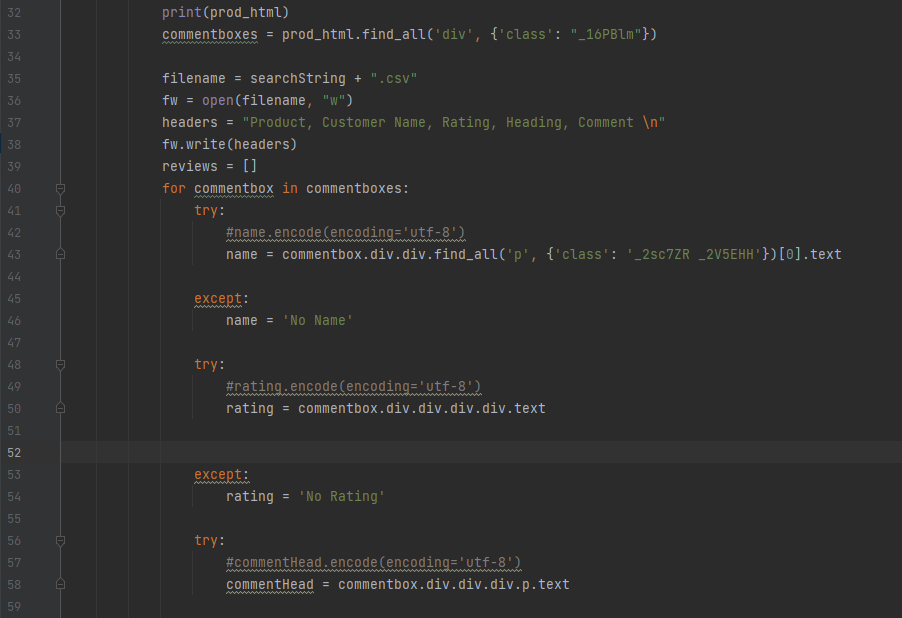

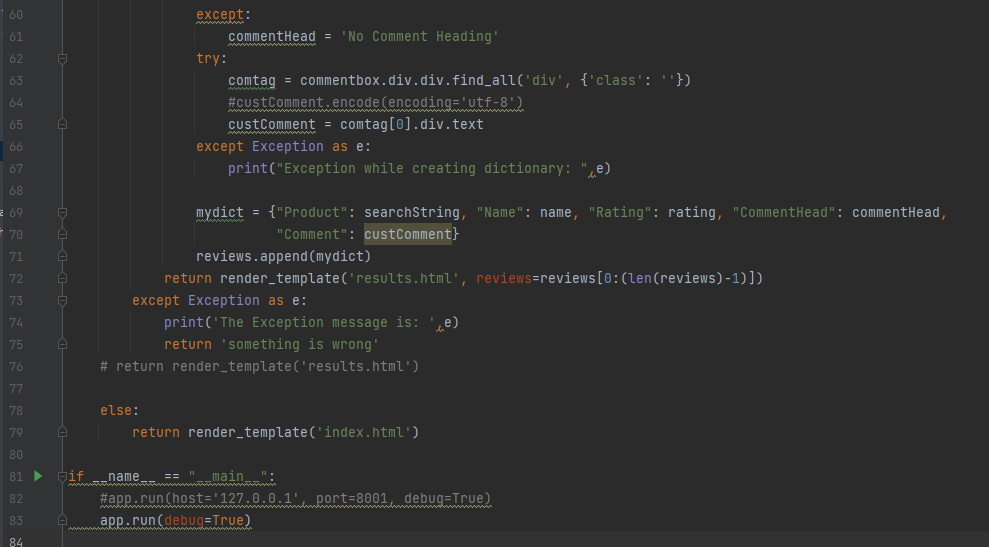

# TASK

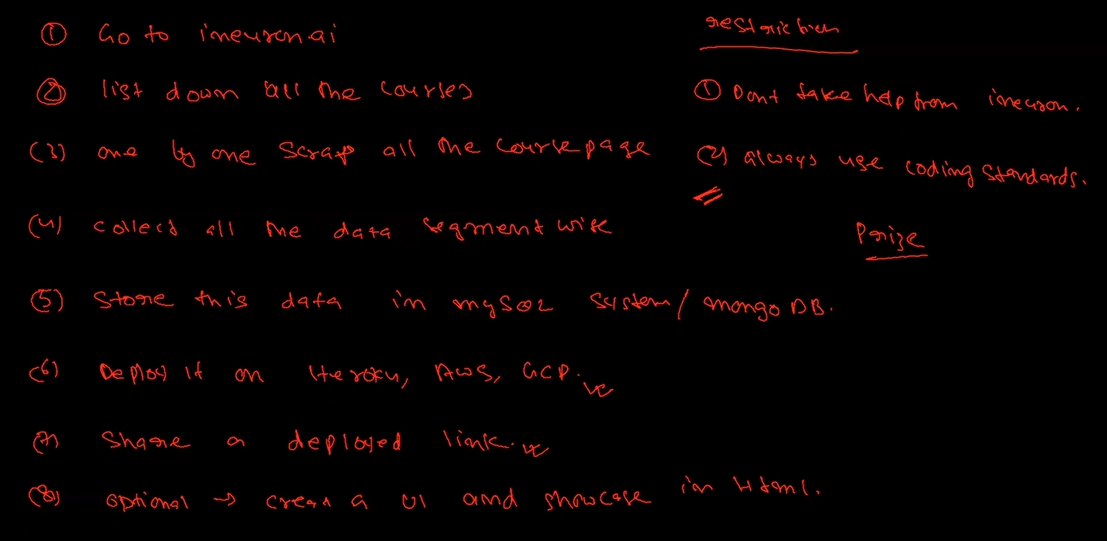